<a href="https://colab.research.google.com/github/Ruthuja-Gaikwad/DAUP/blob/main/Human_Activity_Recognition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/human-activity-recognition-with-smartphones")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/human-activity-recognition-with-smartphones


In [ ]:
ls /root/.cache/kagglehub/datasets/uciml/human-activity-recognition-with-smartphones/versions/2

test.csv  train.csv


In [ ]:
import pandas as pd
import numpy as np
import os


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
train_path = "/root/.cache/kagglehub/datasets/uciml/human-activity-recognition-with-smartphones/versions/2/train.csv"
test_path = "/root/.cache/kagglehub/datasets/uciml/human-activity-recognition-with-smartphones/versions/2/test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Check data shape and head
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print(train_df.head())


Train shape: (7352, 563)
Test shape: (2947, 563)
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBod

In [ ]:
print("Missing values in train:\n", train_df.isnull().sum().sum())
print("Missing values in test:\n", test_df.isnull().sum().sum())

Missing values in train:
 0
Missing values in test:
 0


In [ ]:
print(train_df.dtypes)

tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train_df['Activity'] = le.fit_transform(train_df['Activity'])
test_df['Activity'] = le.transform(test_df['Activity'])

# Store label mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Encoding:", label_mapping)


Label Encoding: {'LAYING': np.int64(0), 'SITTING': np.int64(1), 'STANDING': np.int64(2), 'WALKING': np.int64(3), 'WALKING_DOWNSTAIRS': np.int64(4), 'WALKING_UPSTAIRS': np.int64(5)}


In [ ]:
from sklearn.preprocessing import StandardScaler

# Drop labels
X_train = train_df.drop("Activity", axis=1)
y_train = train_df["Activity"]
X_test = test_df.drop("Activity", axis=1)
y_test = test_df["Activity"]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<ipython-input-30-c505971ea472>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='Activity', order=train_df['Activity'].value_counts().index, palette='viridis')


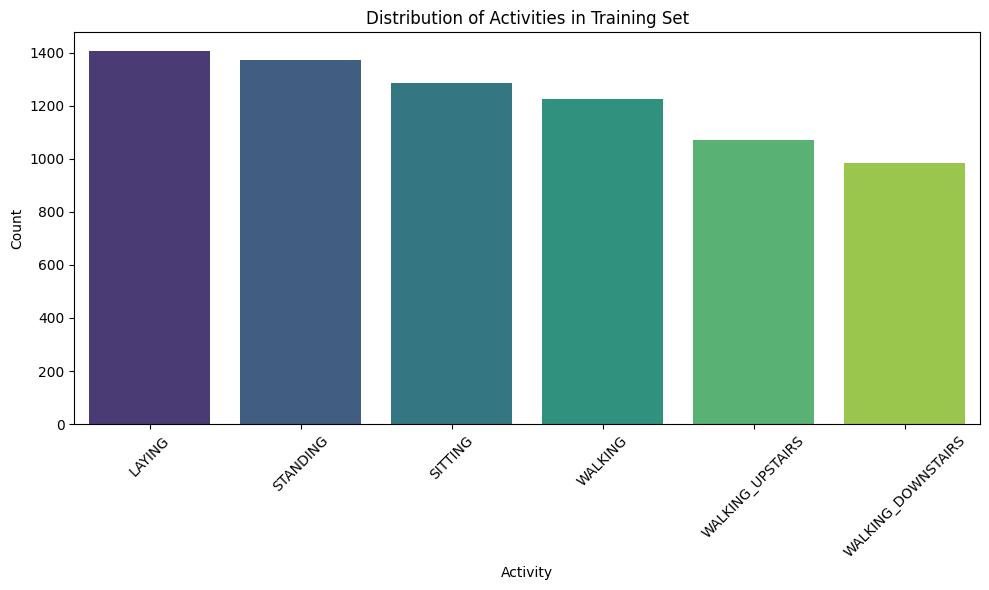

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use the original activity names before encoding if needed
# Reload the dataset with original activity labels
train_df = pd.read_csv(train_path)

plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Activity', order=train_df['Activity'].value_counts().index, palette='viridis')

plt.title("Distribution of Activities in Training Set")
plt.xlabel("Activity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


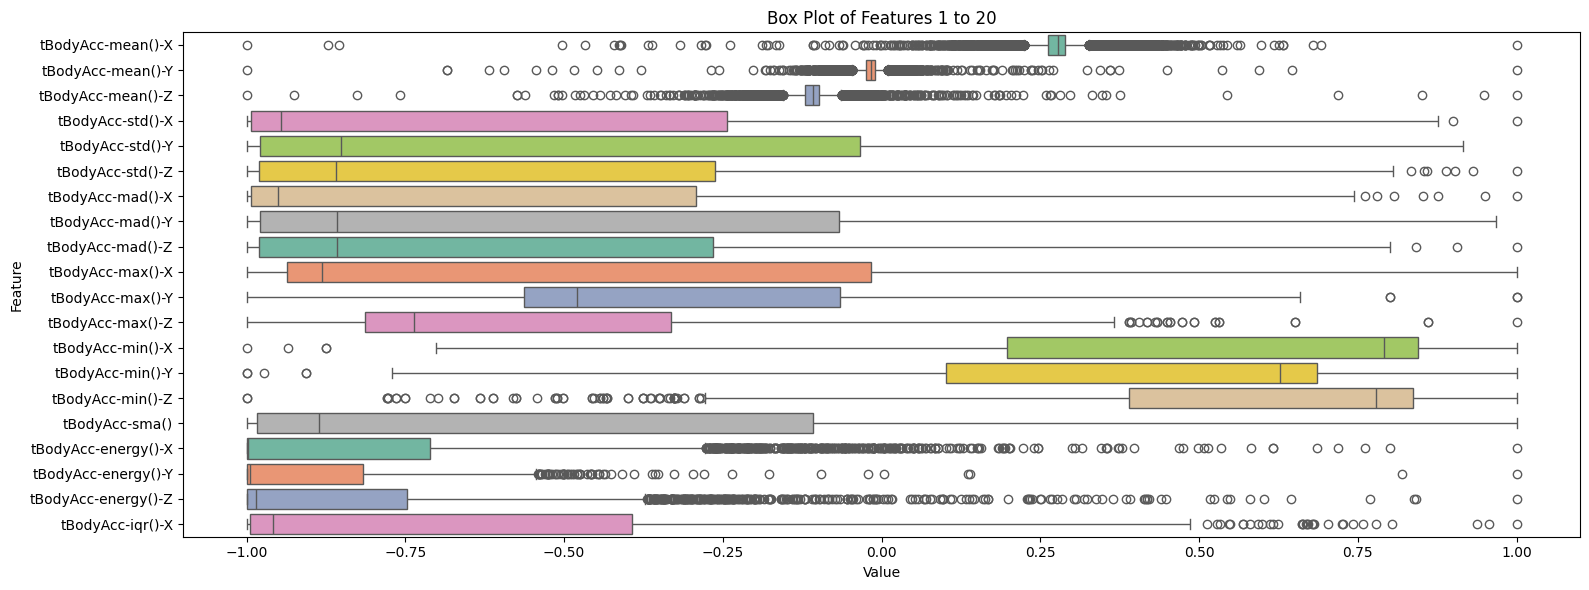

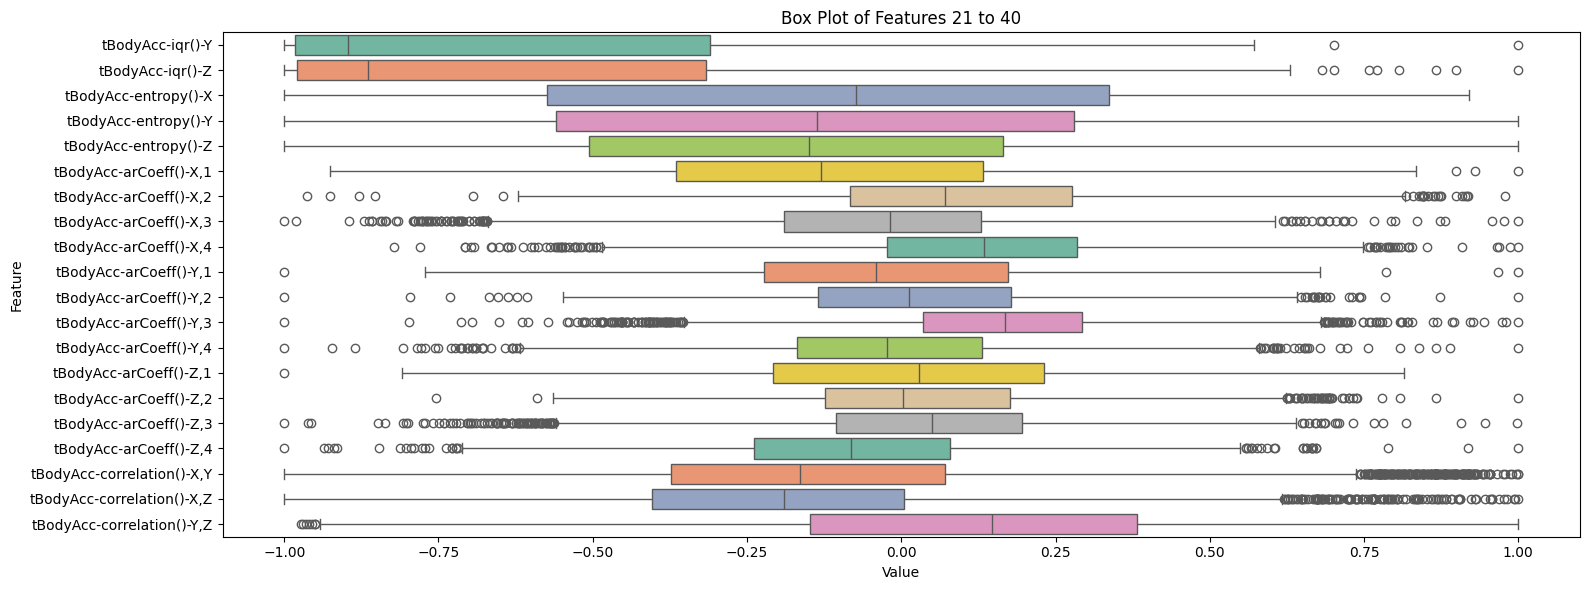

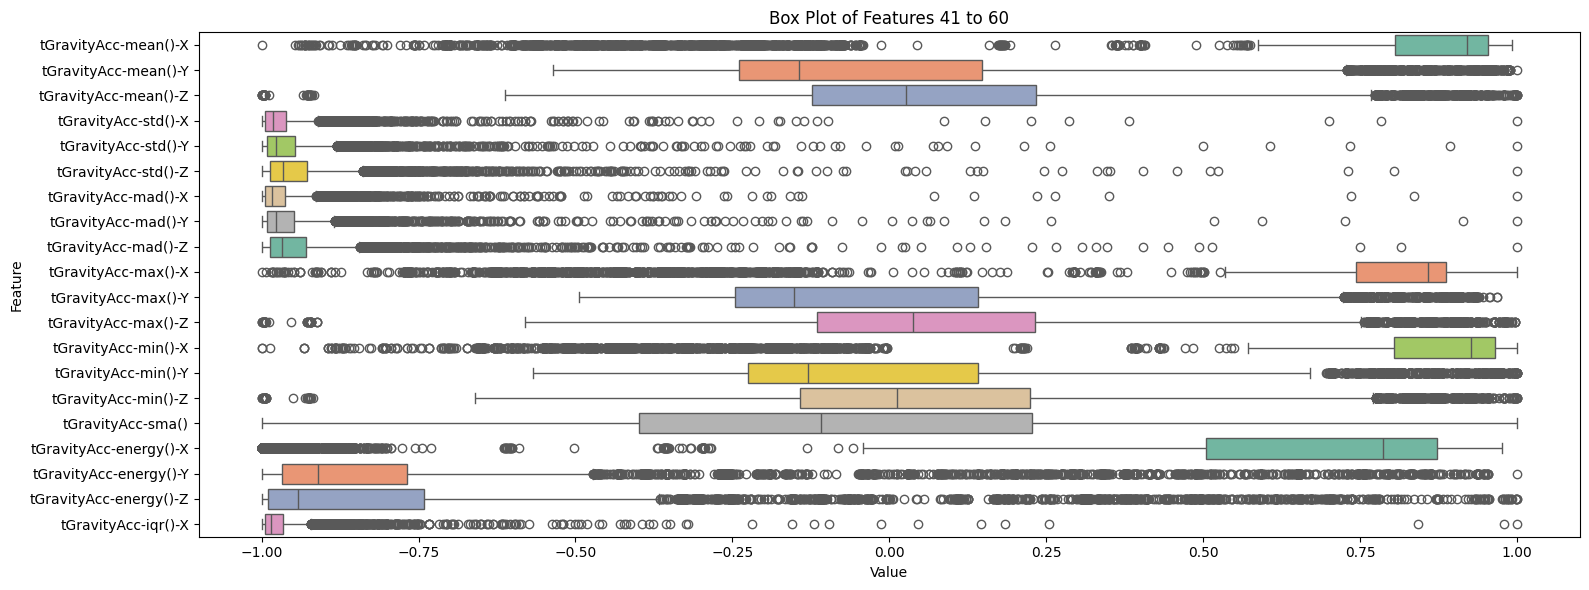

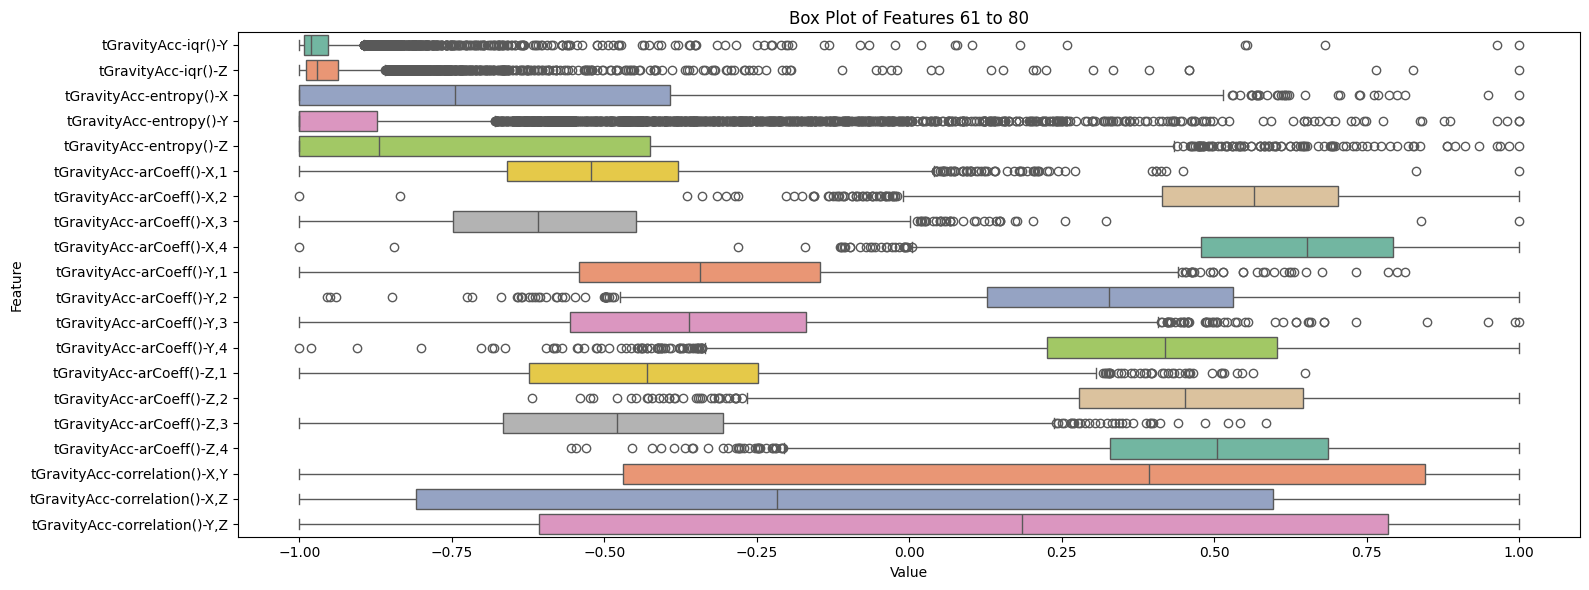

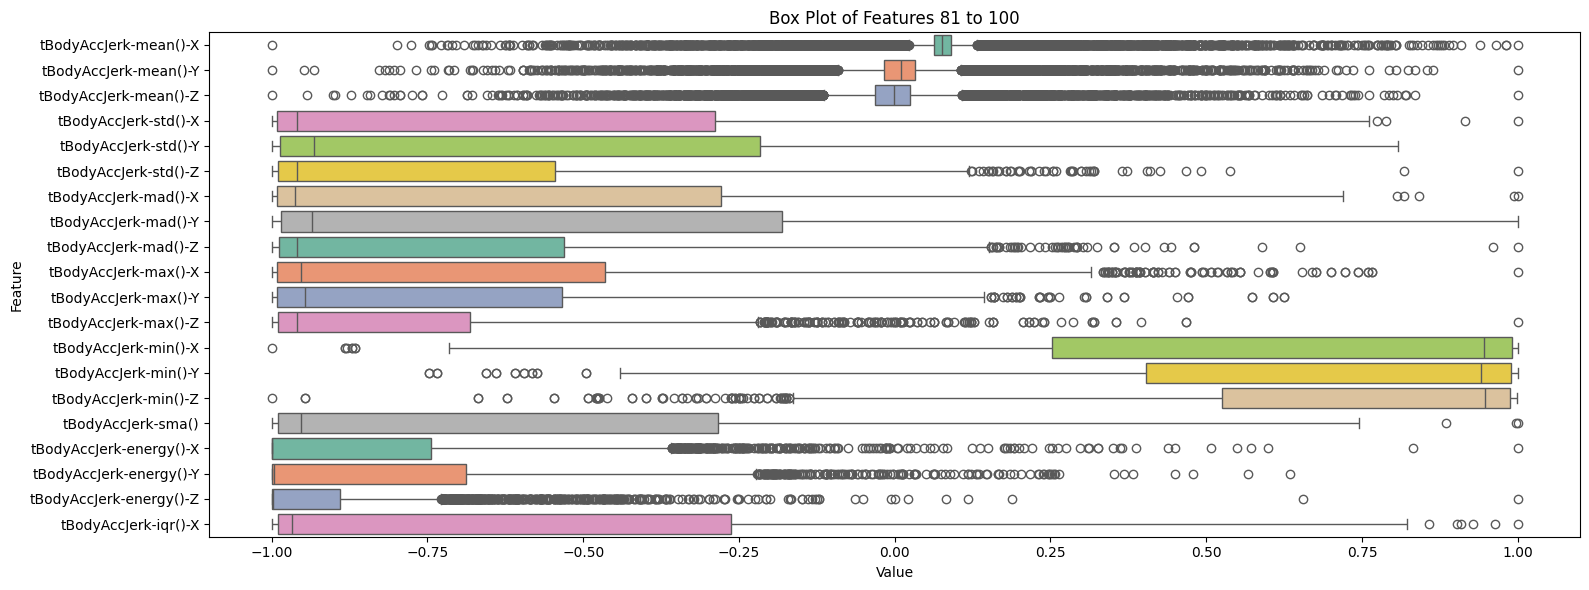

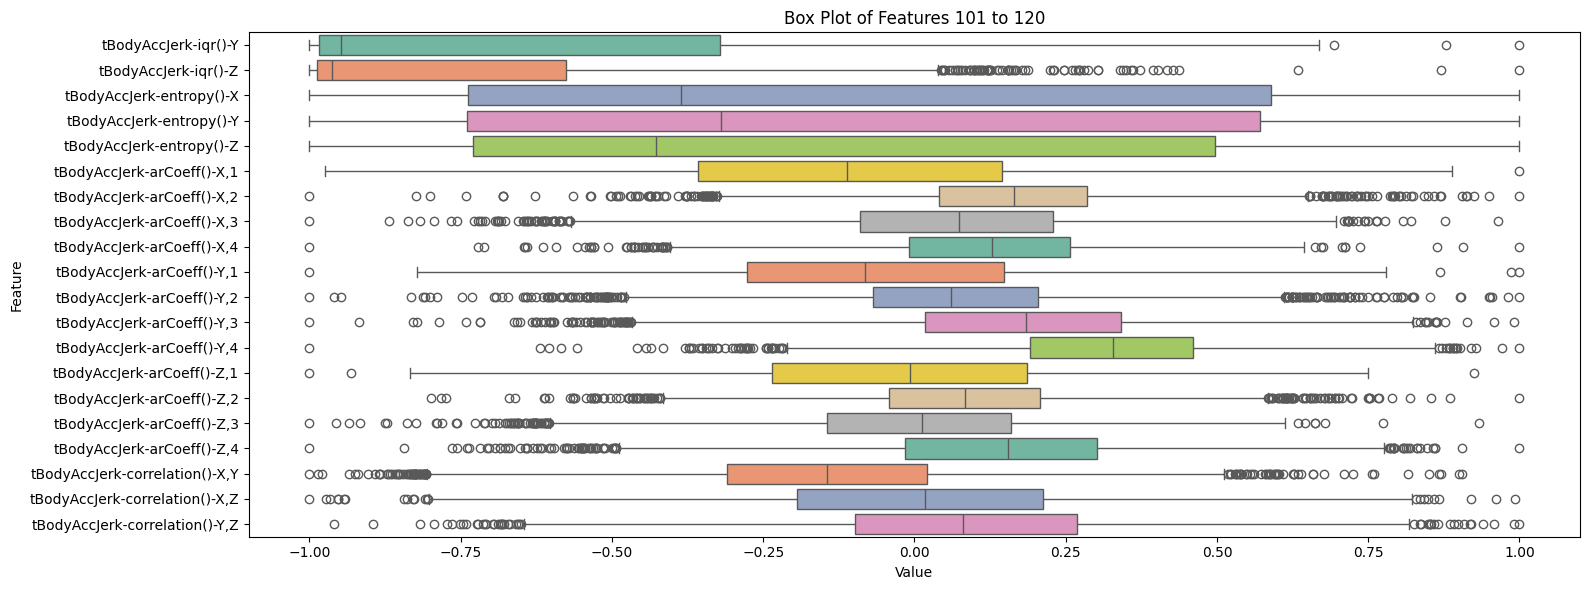

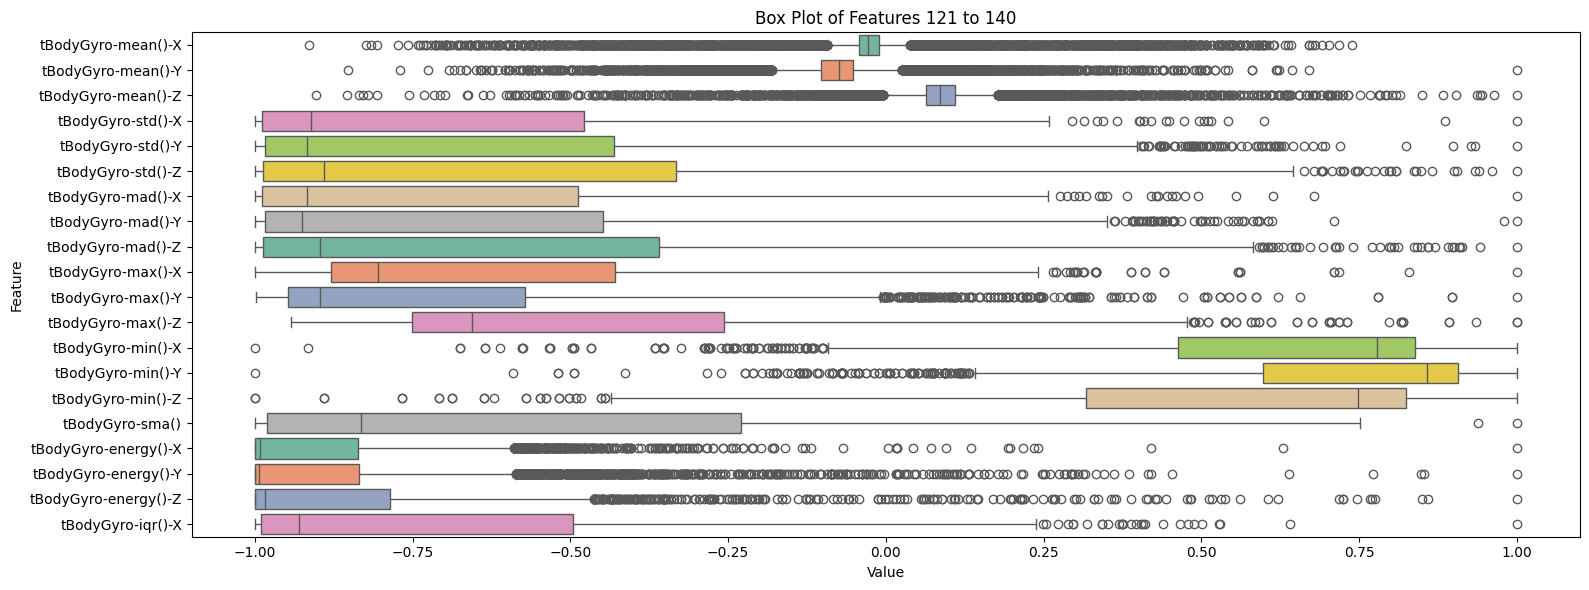

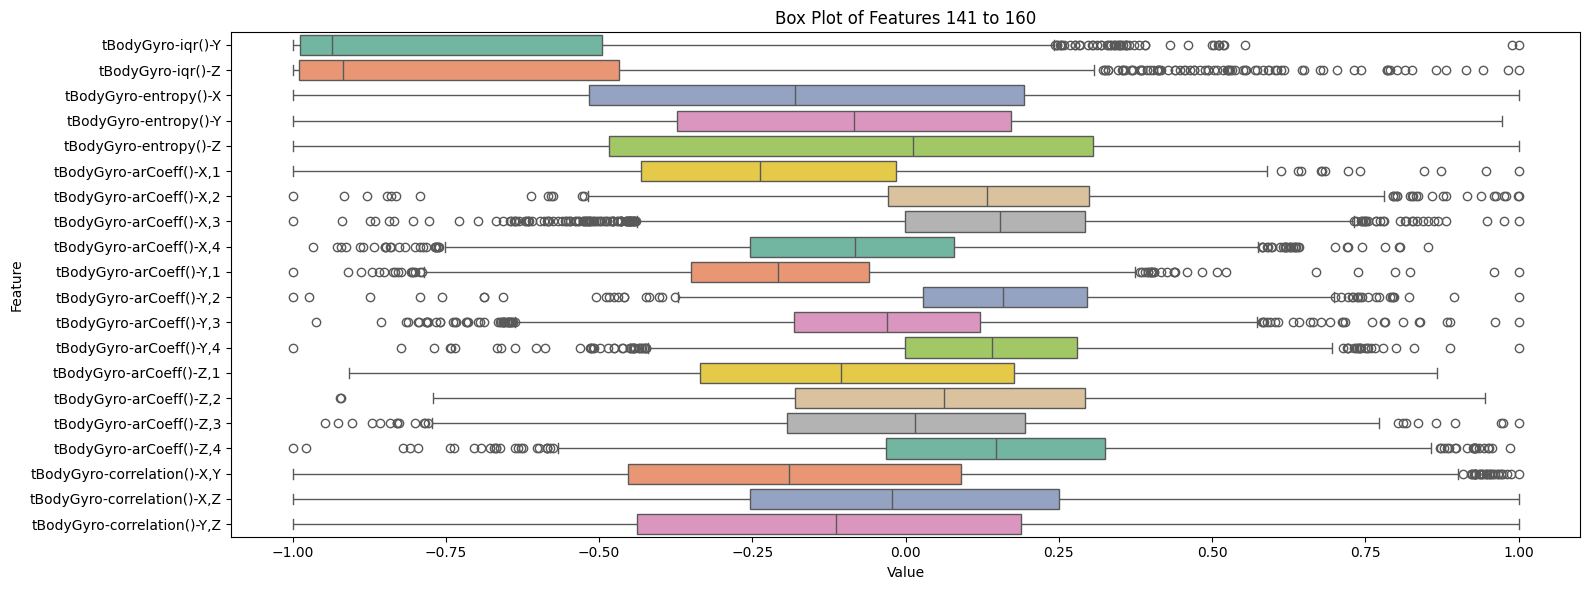

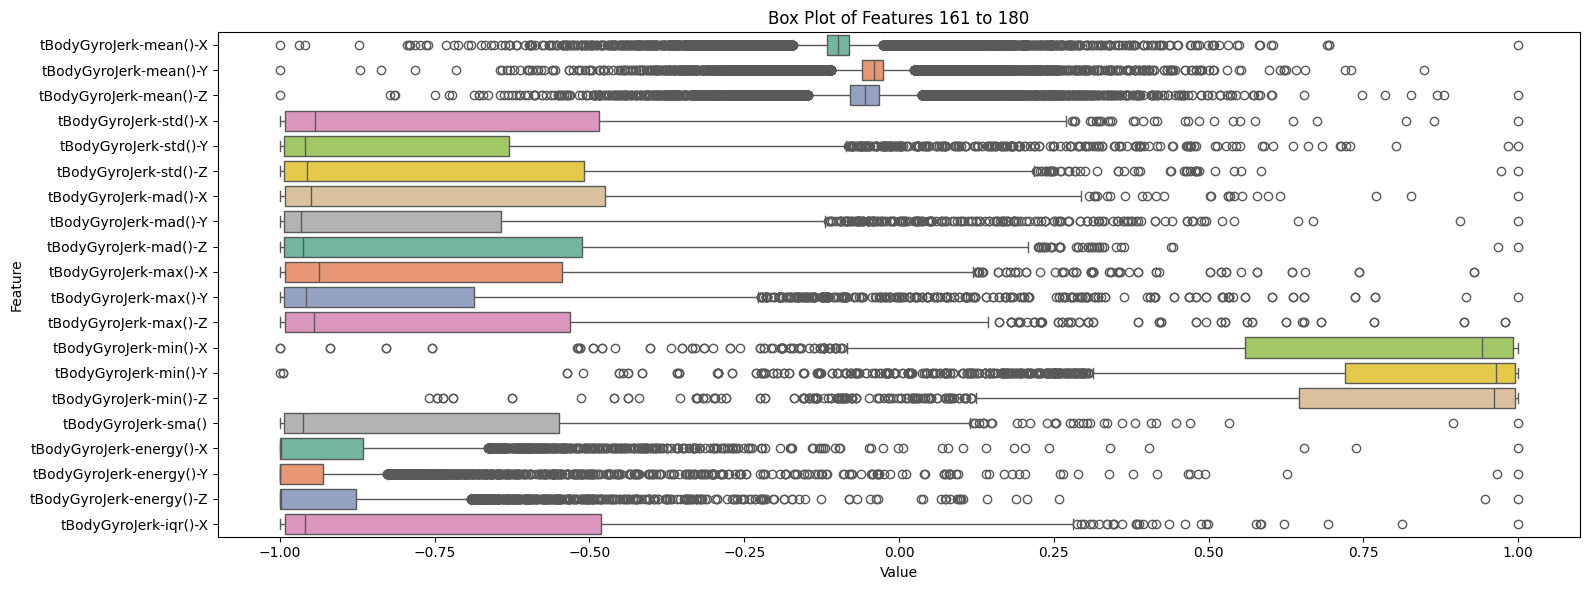

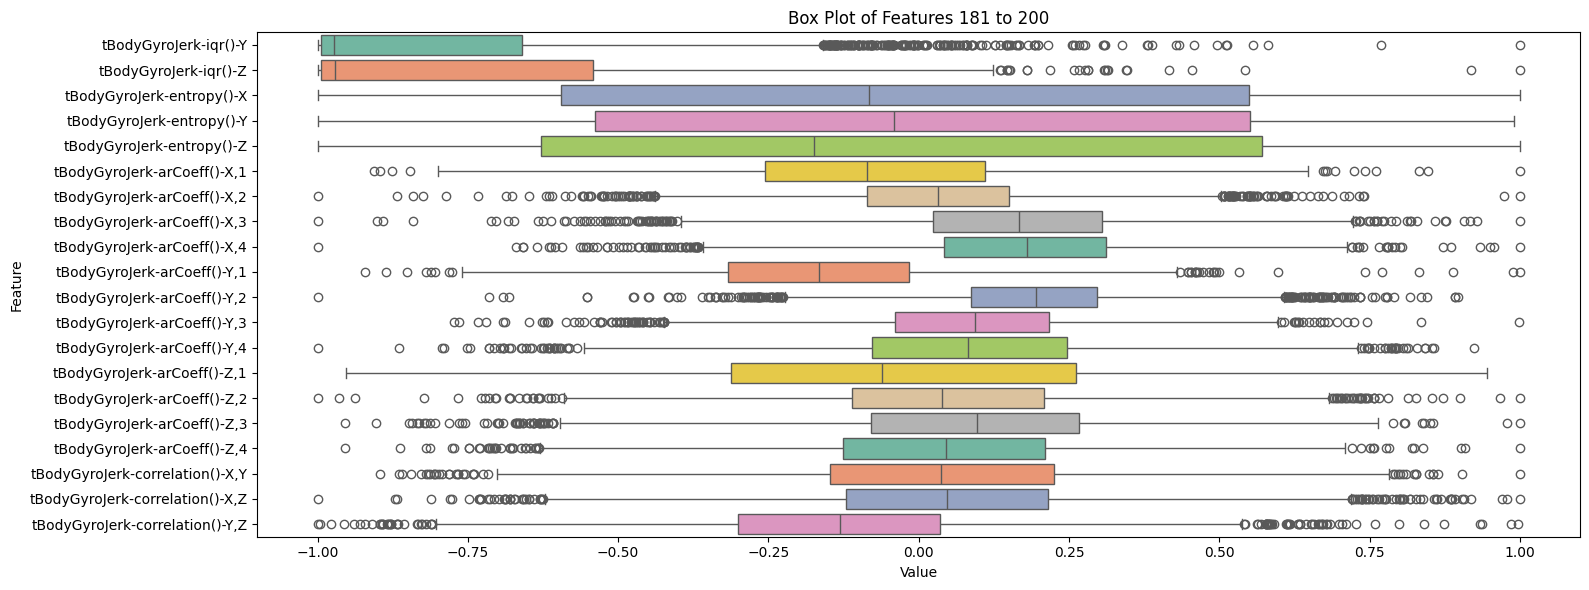

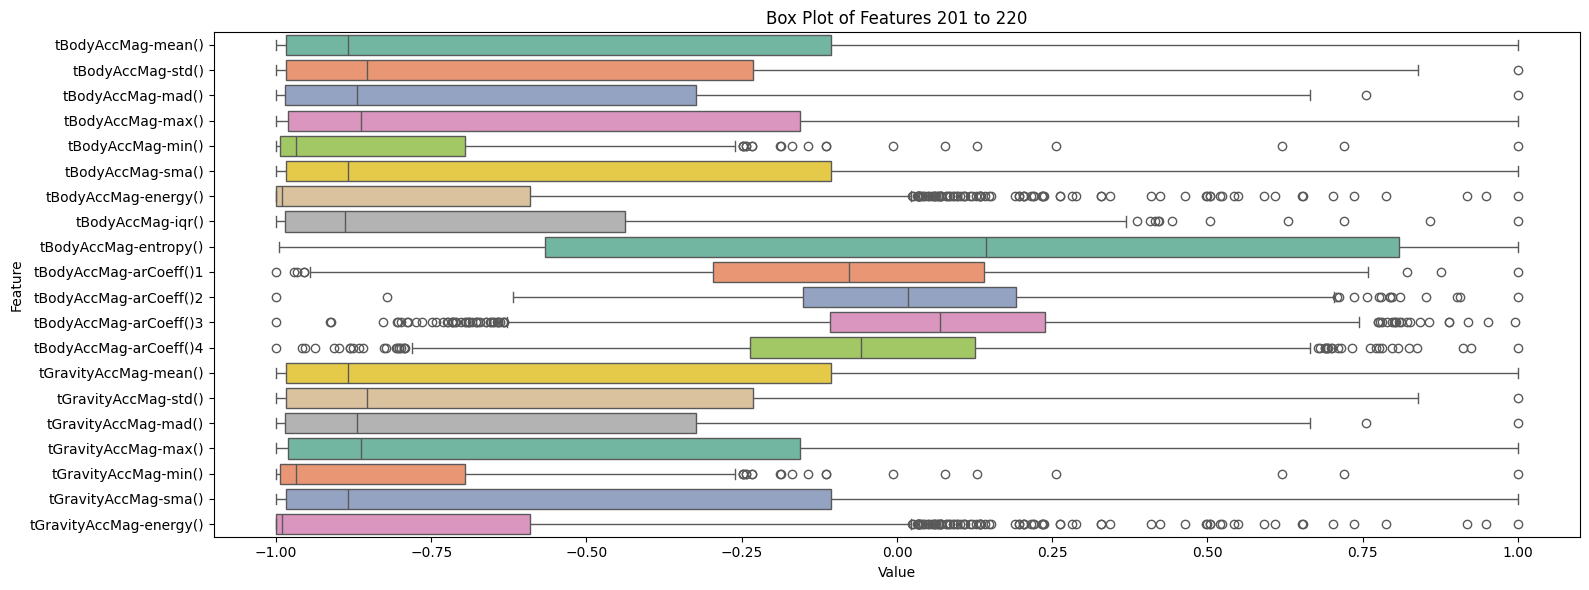

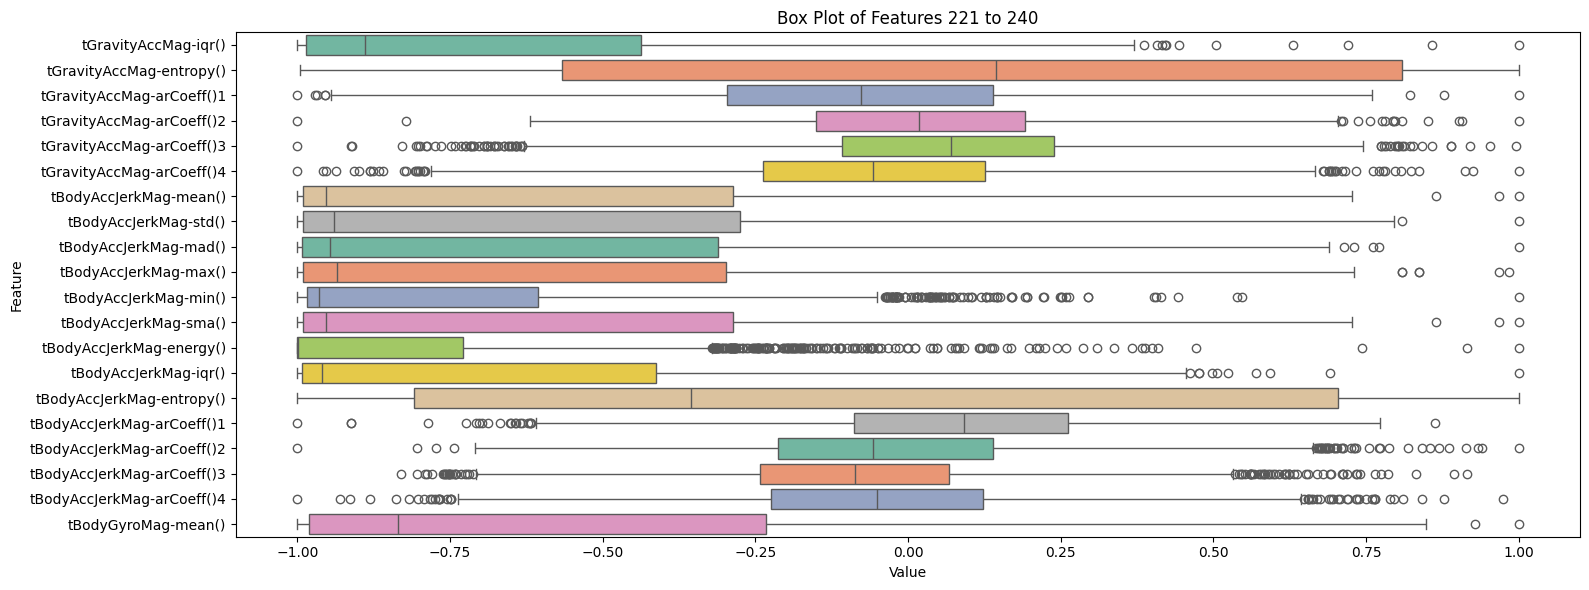

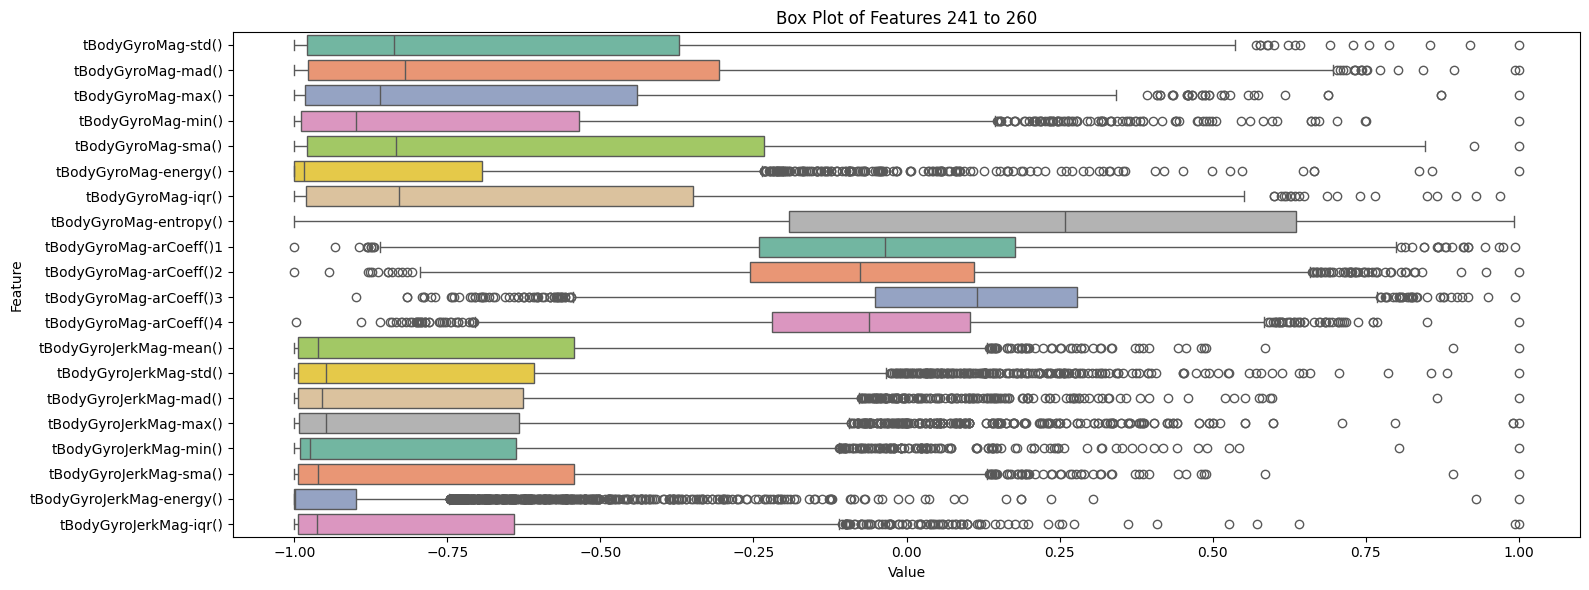

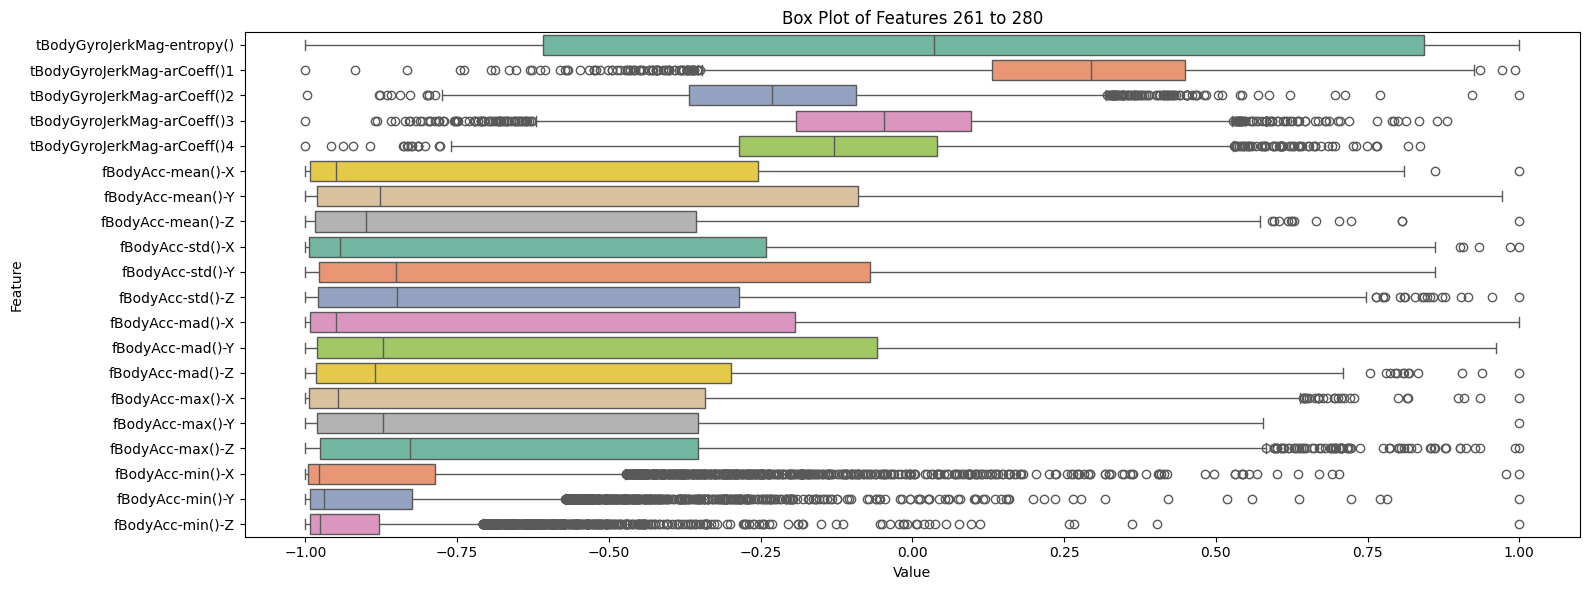

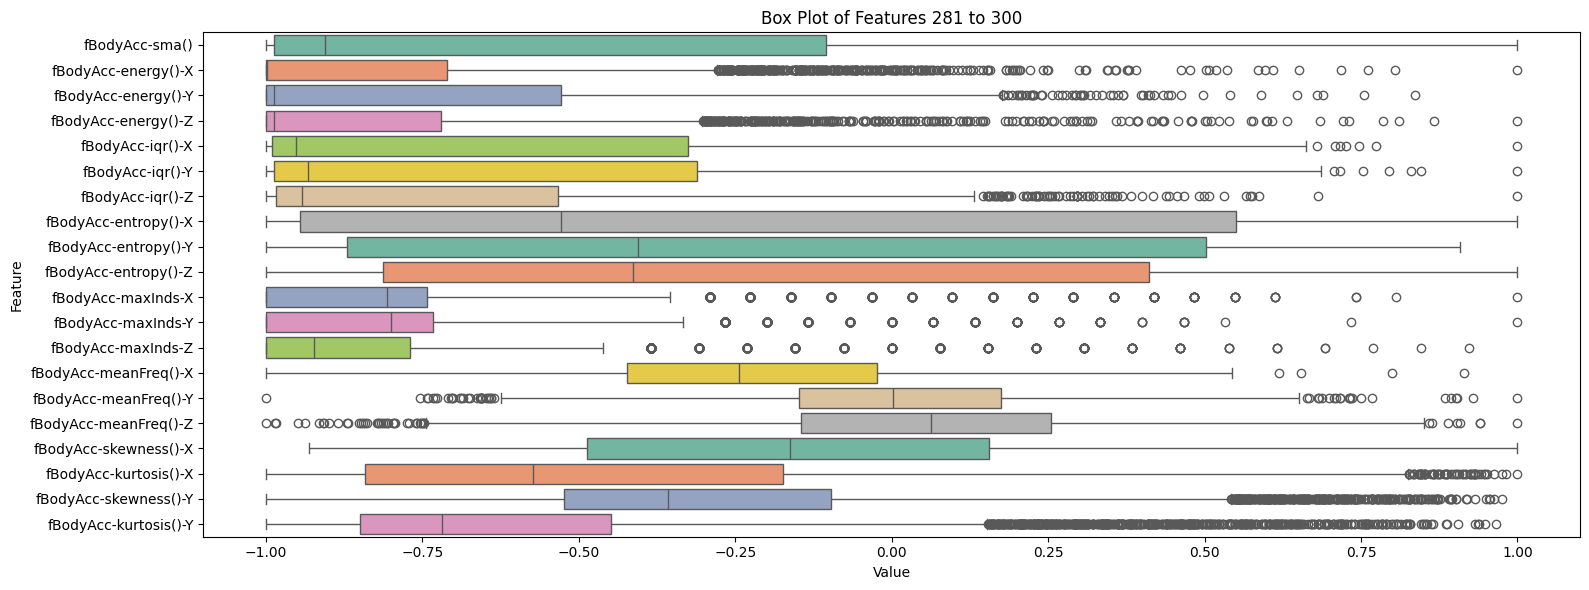

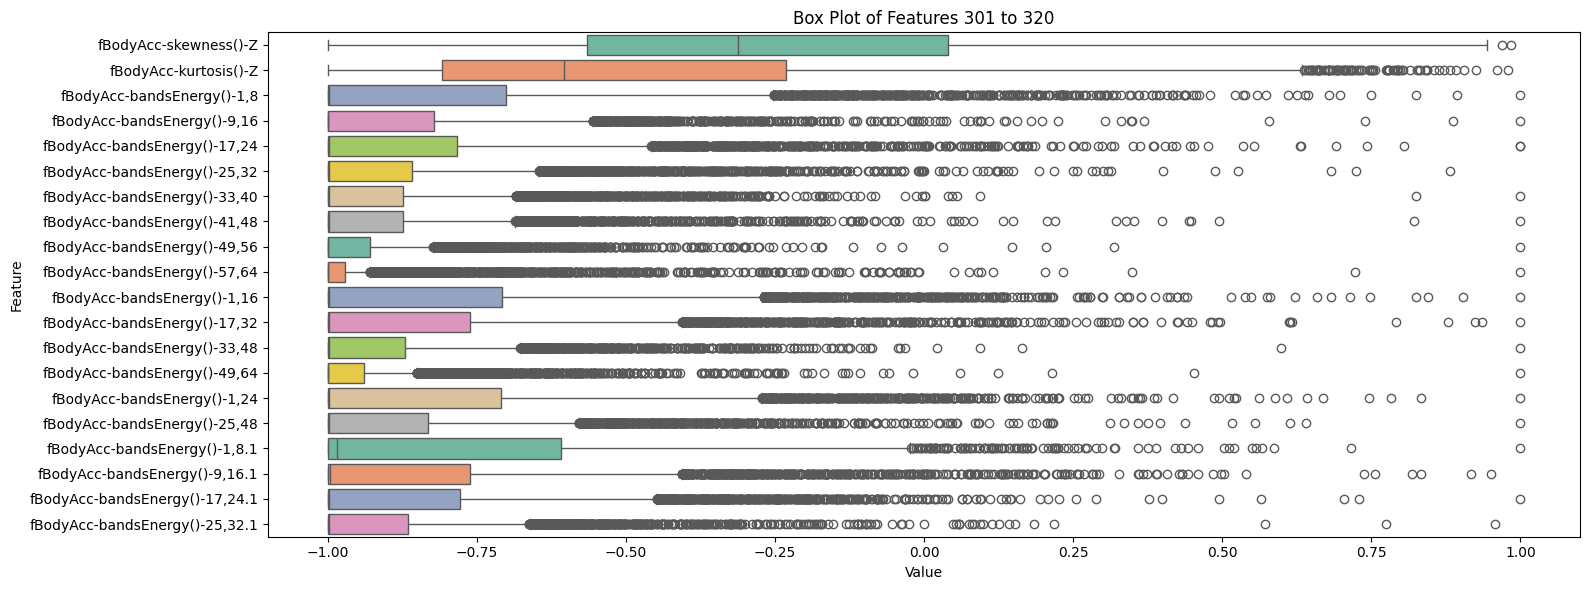

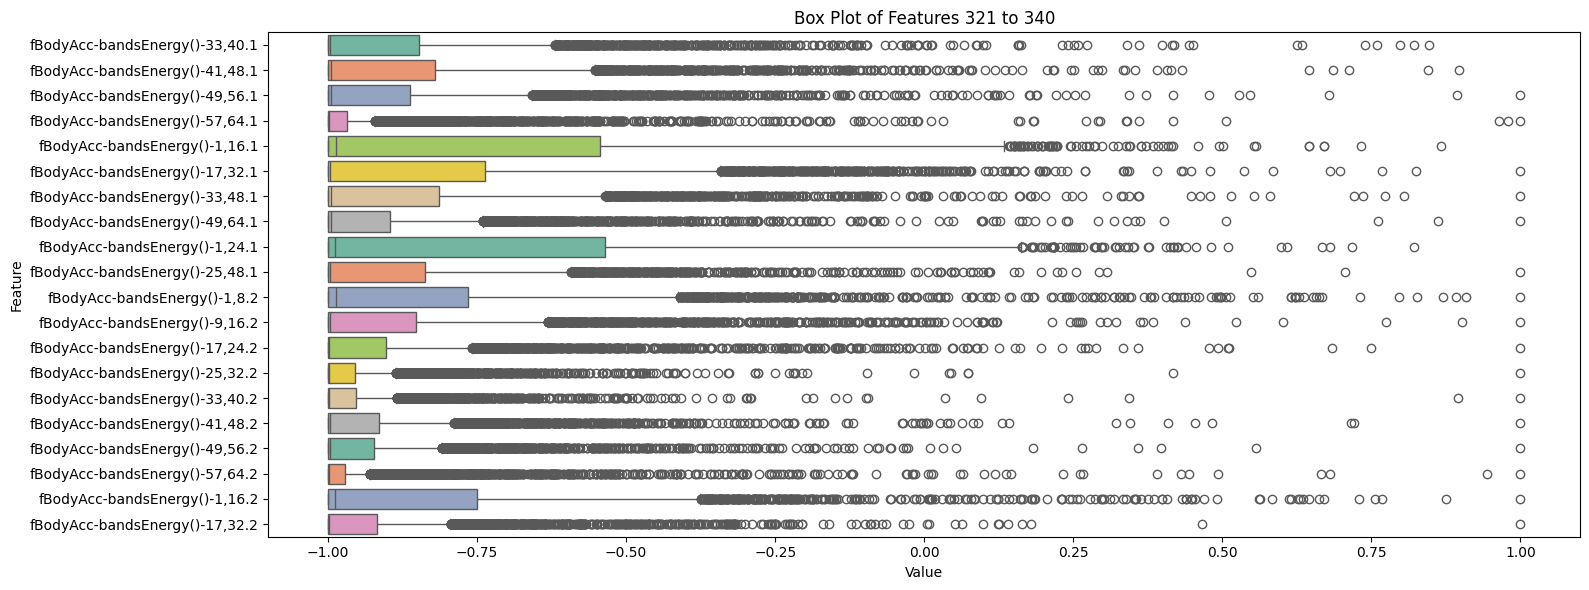

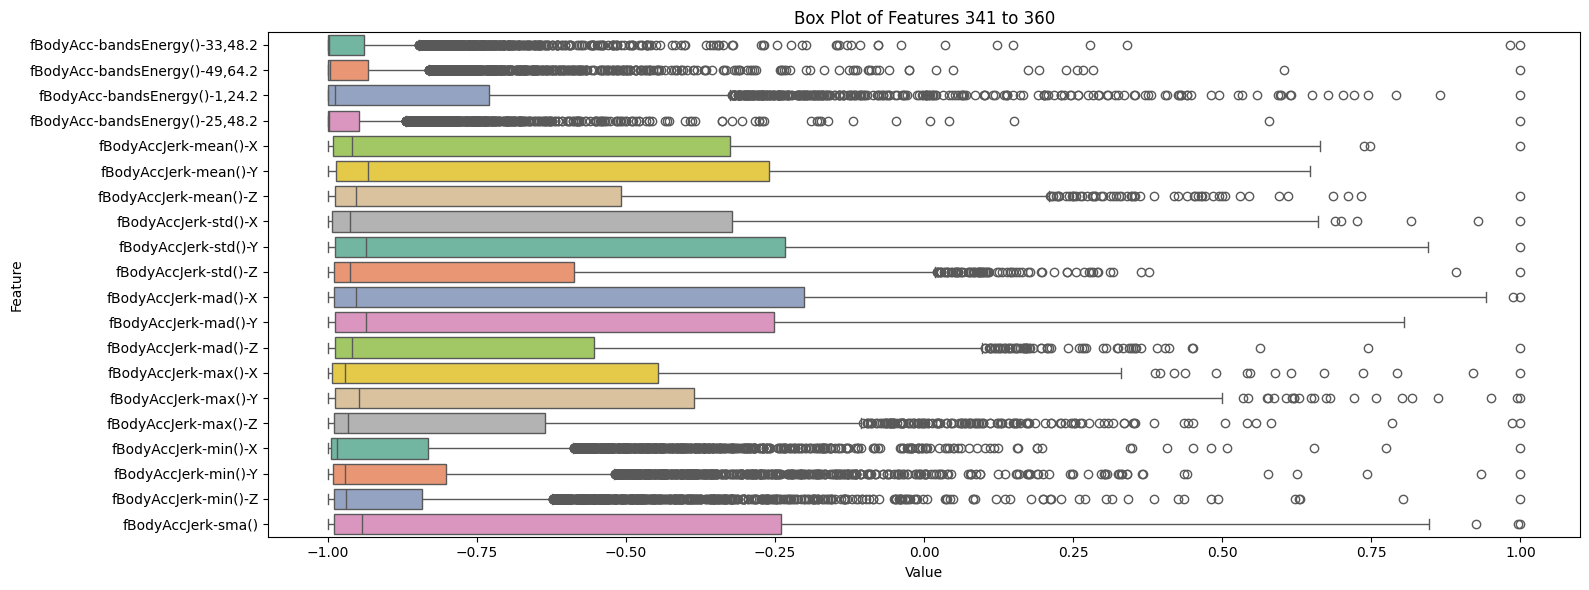

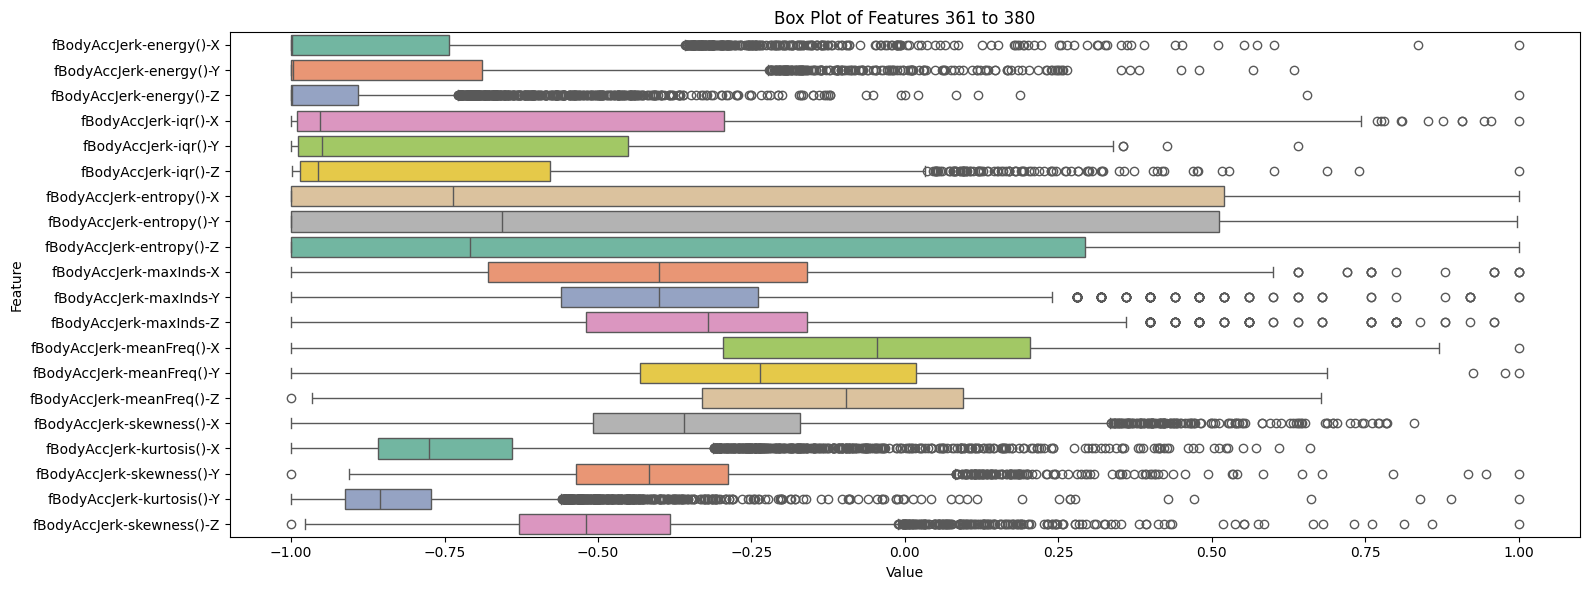

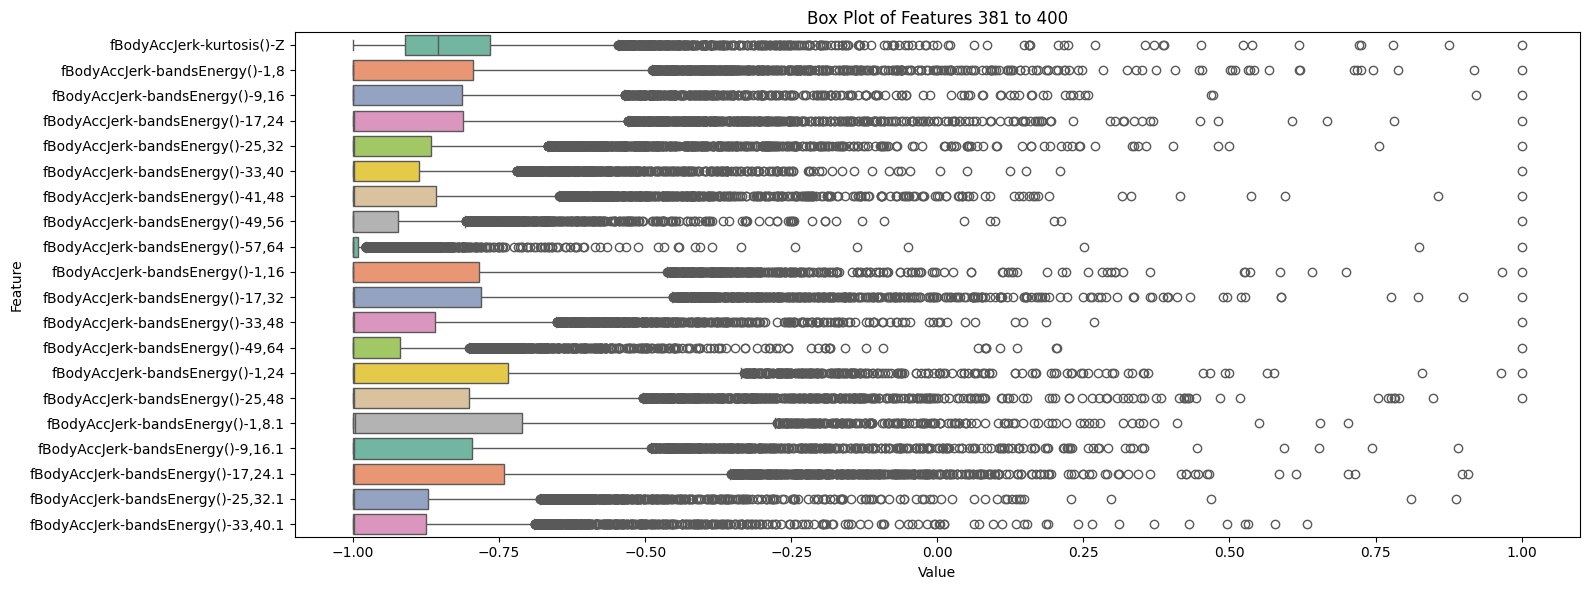

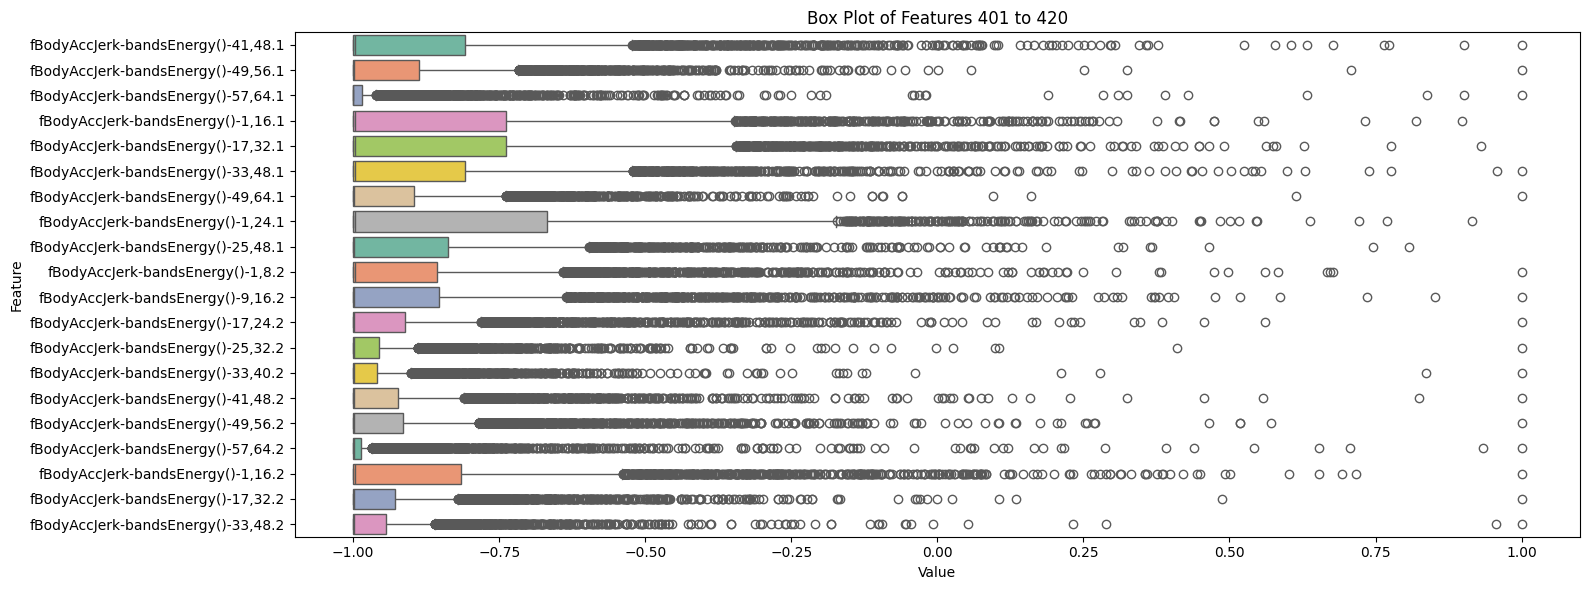

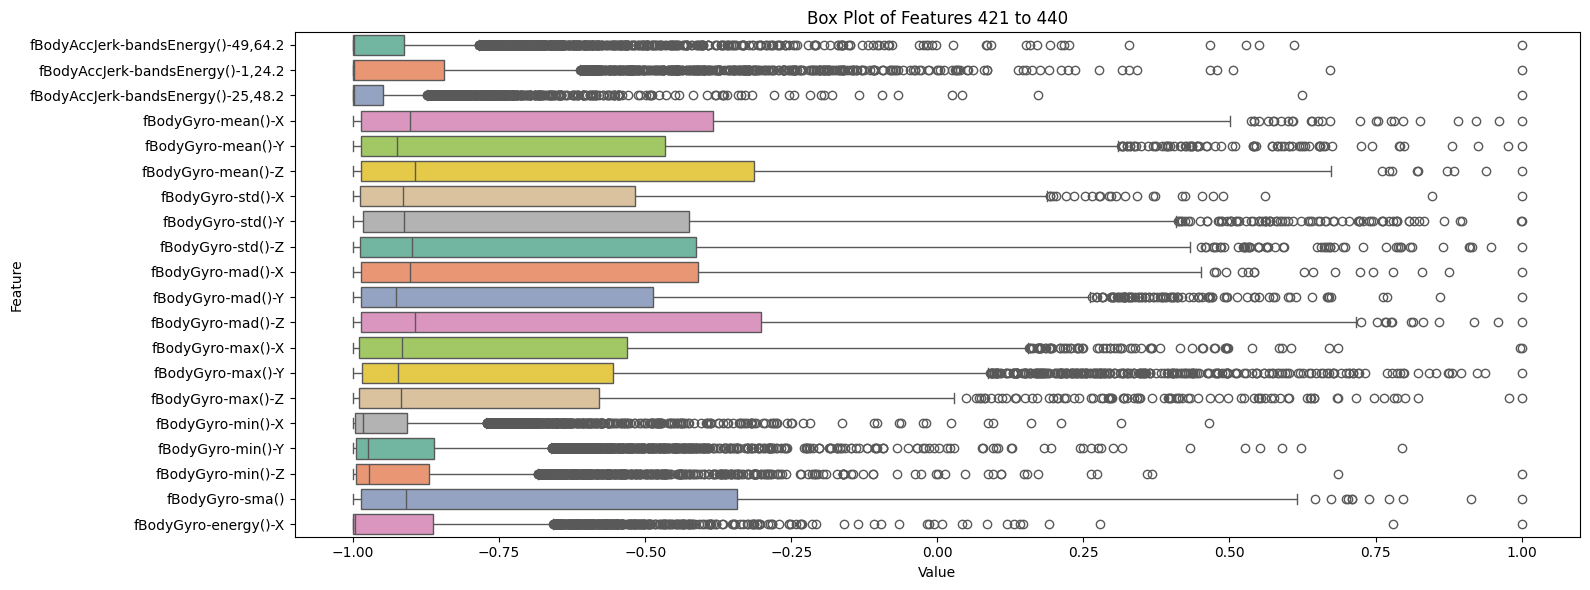

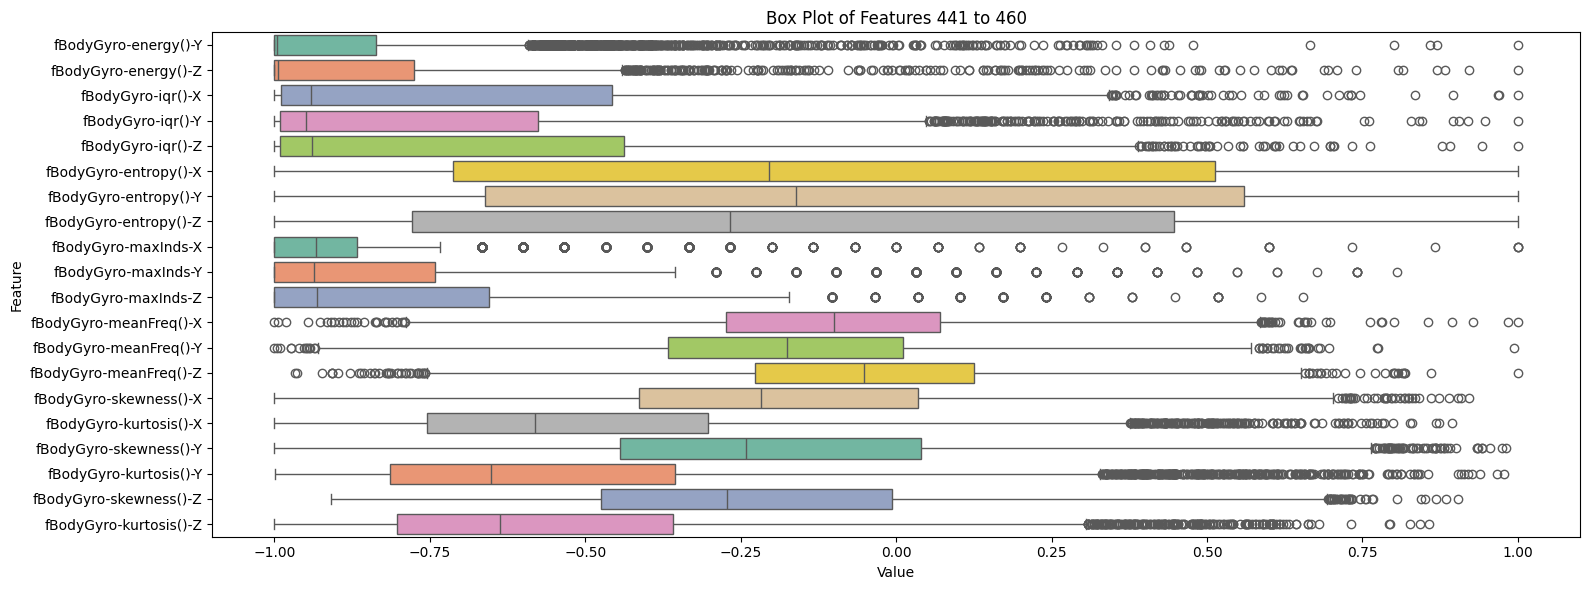

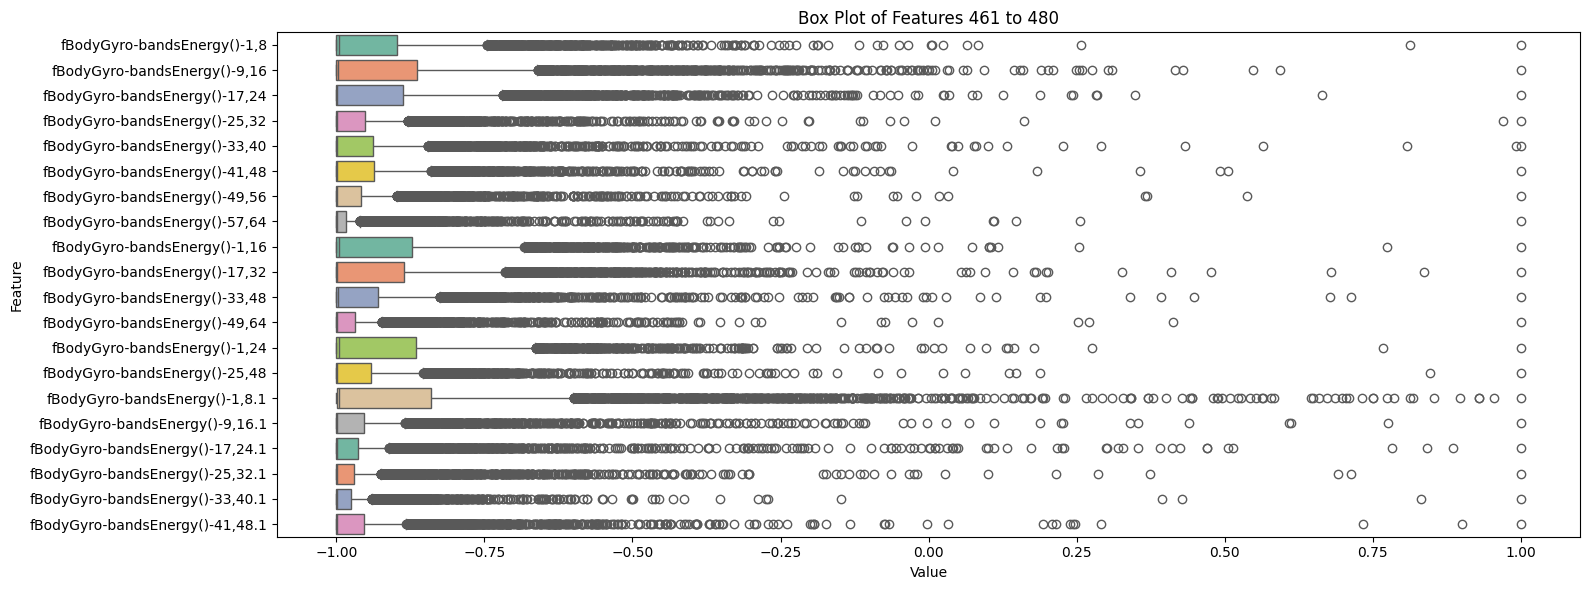

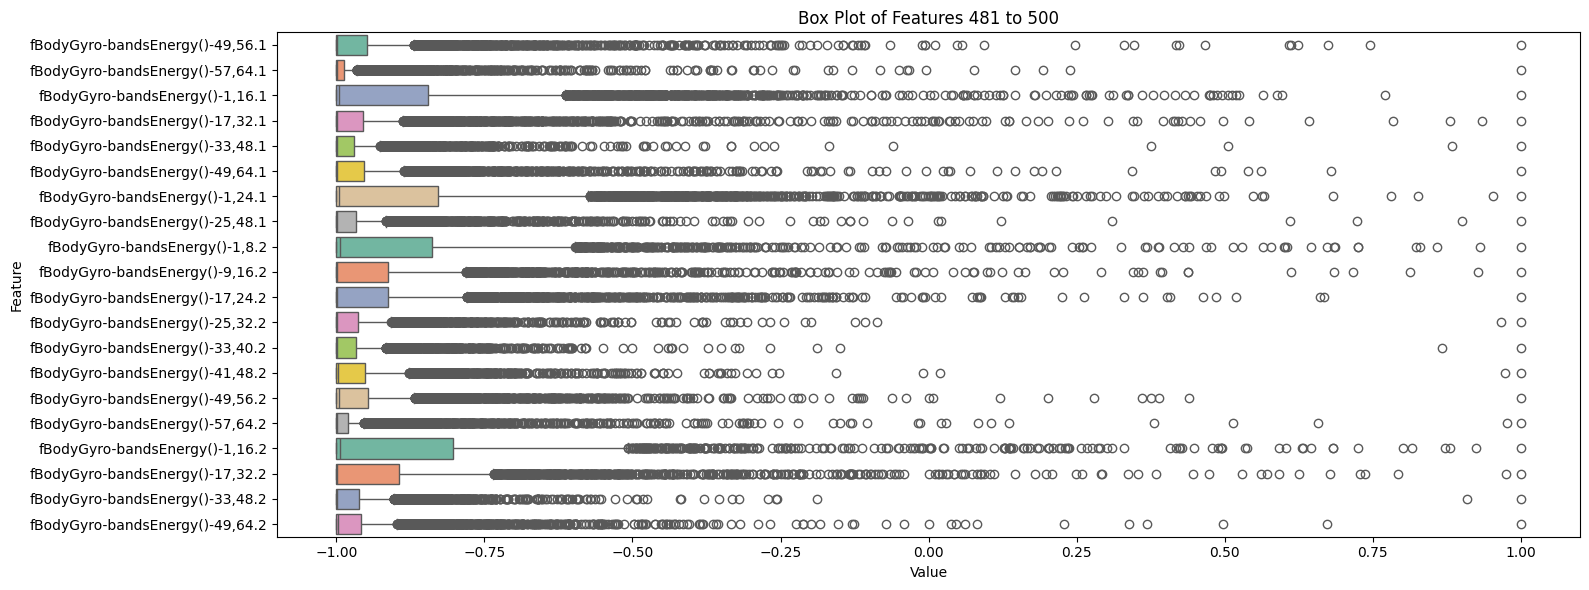

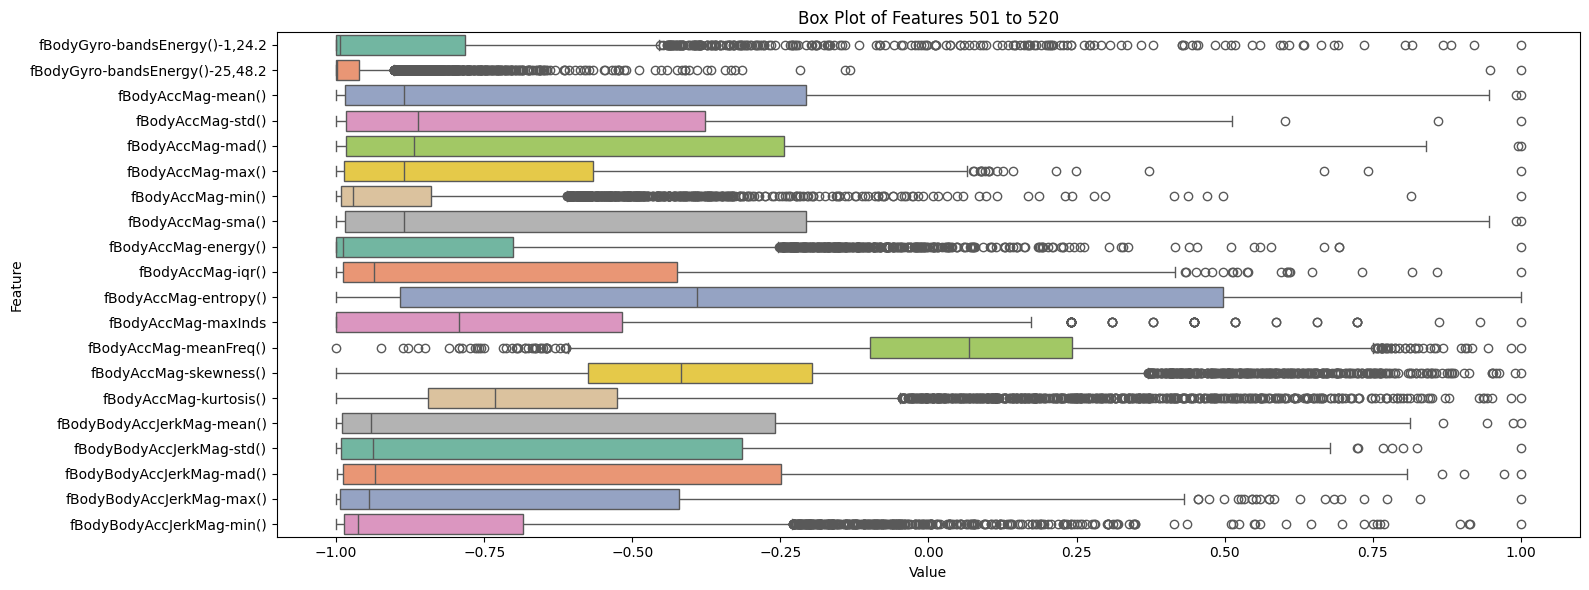

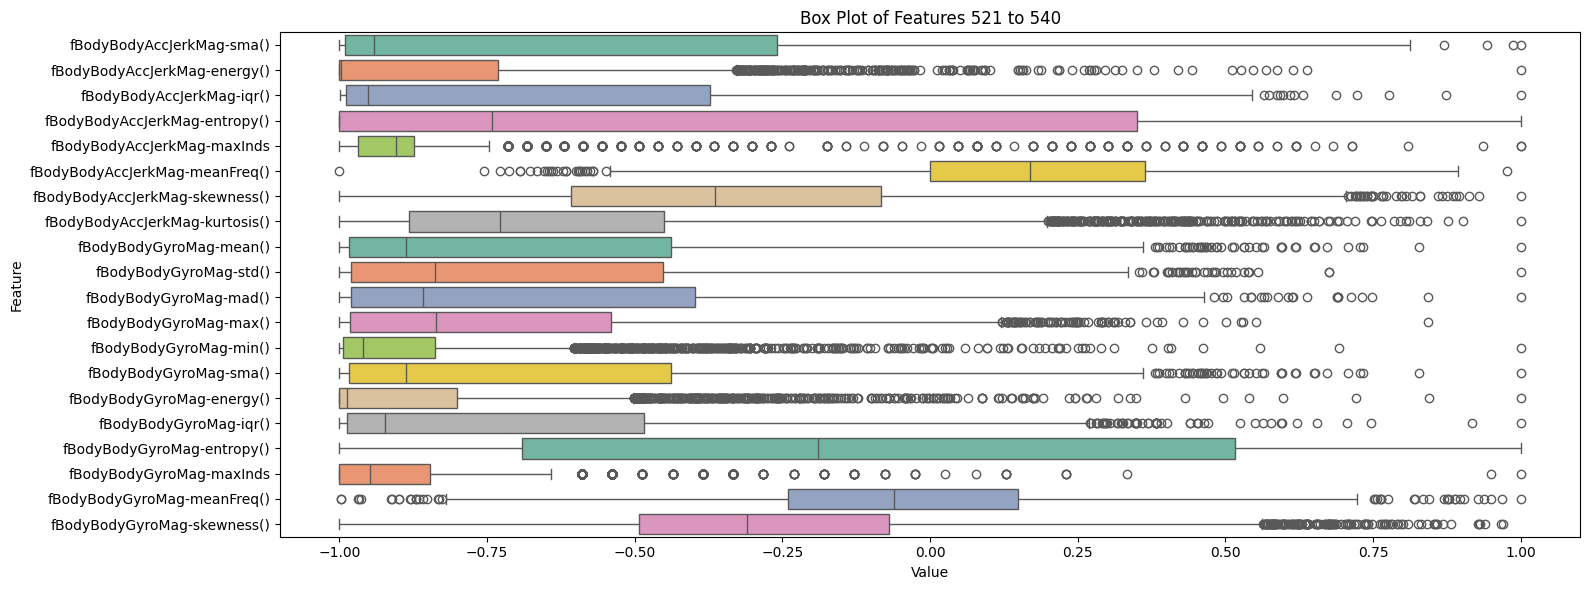

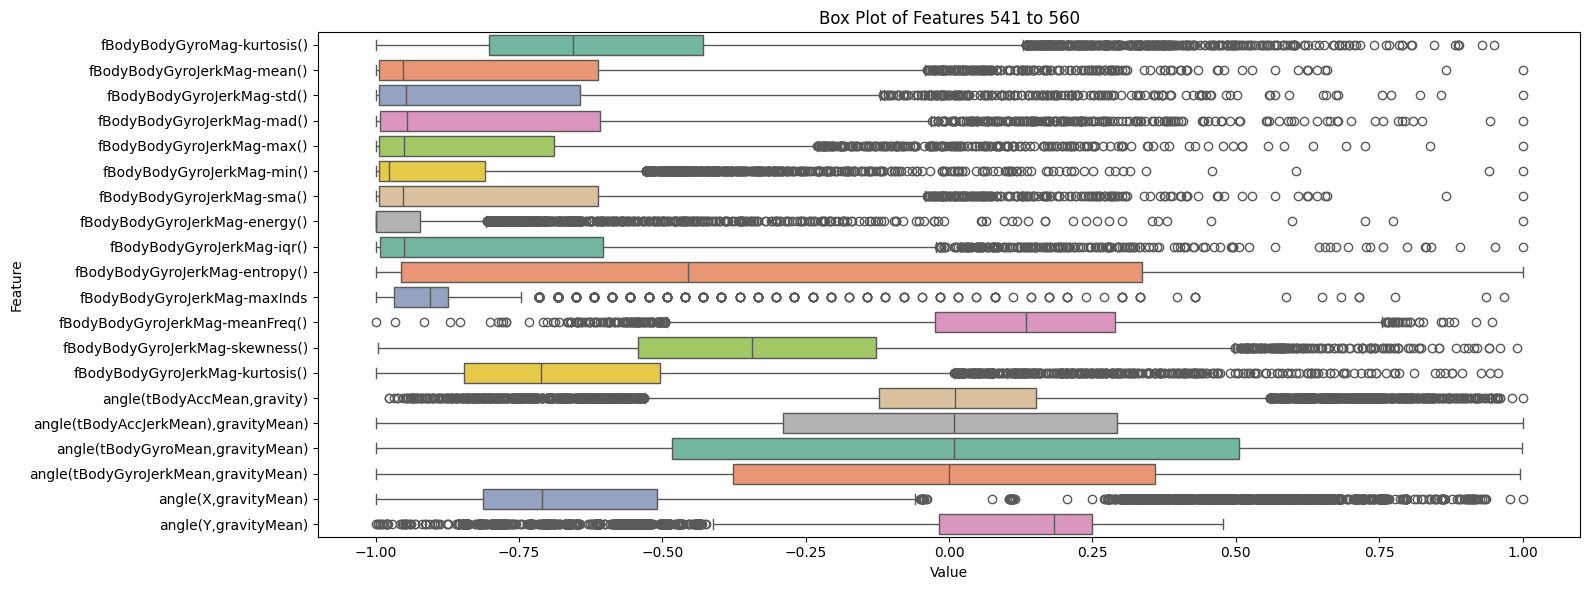

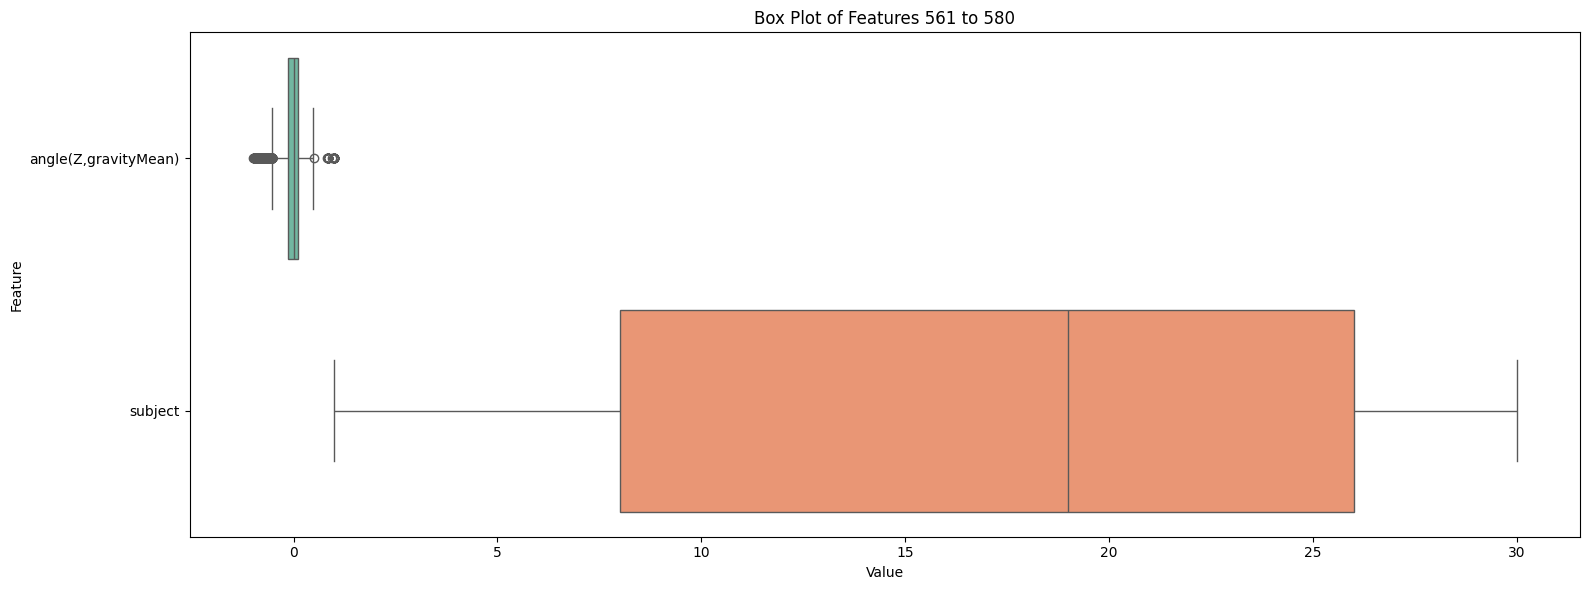

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Limit to first 20 features to avoid clutter (optional)
for i in range(0, features.shape[1], 20):
    plt.figure(figsize=(16, 6))
    sns.boxplot(data=features.iloc[:, i:i+20], orient='h', palette='Set2')
    plt.title(f"Box Plot of Features {i+1} to {i+20}")
    plt.xlabel("Value")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()



In [ ]:
# Combine features and target for easier filtering
y = train_df['Activity']
combined_df = pd.concat([features, y], axis=1)

# IQR Outlier removal for selected features
for col in features:
    Q1 = combined_df[col].quantile(0.25)
    Q3 = combined_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    combined_df = combined_df[(combined_df[col] >= lower) & (combined_df[col] <= upper)]

# After filtering
features_cleaned = combined_df.drop(columns=['Activity'])
y_cleaned = combined_df['Activity']


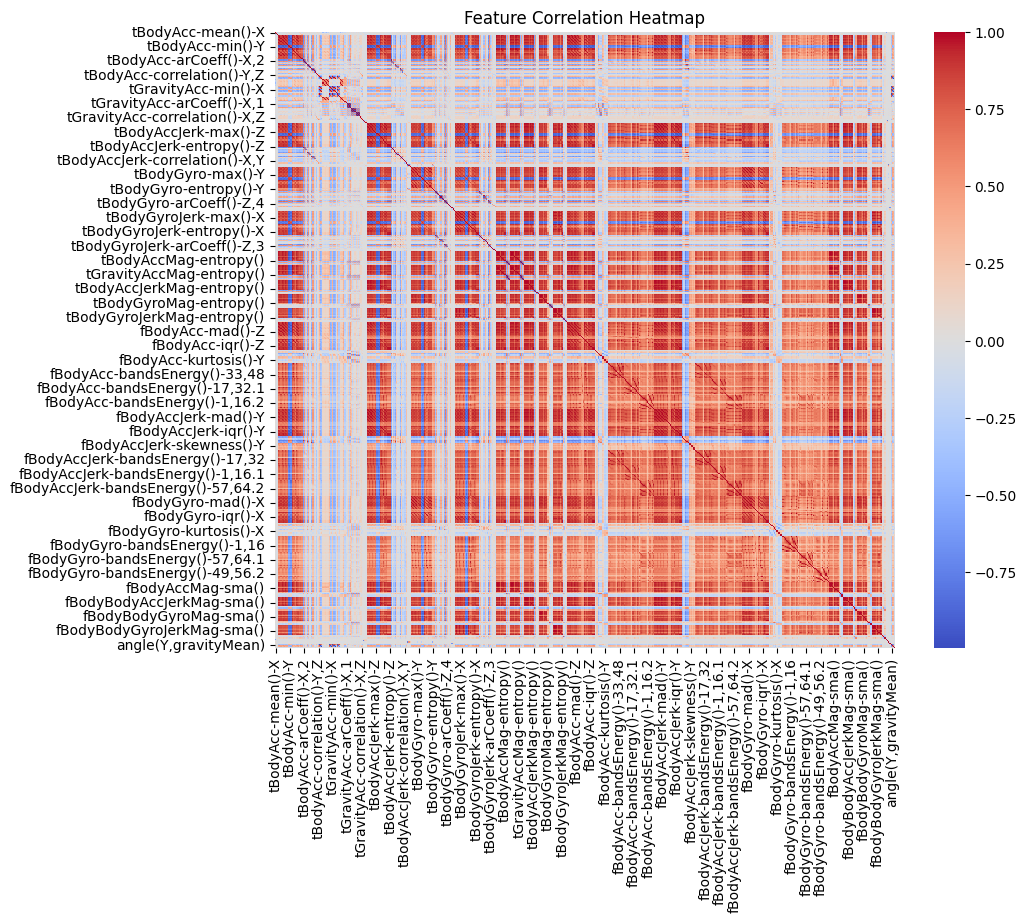

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(features.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


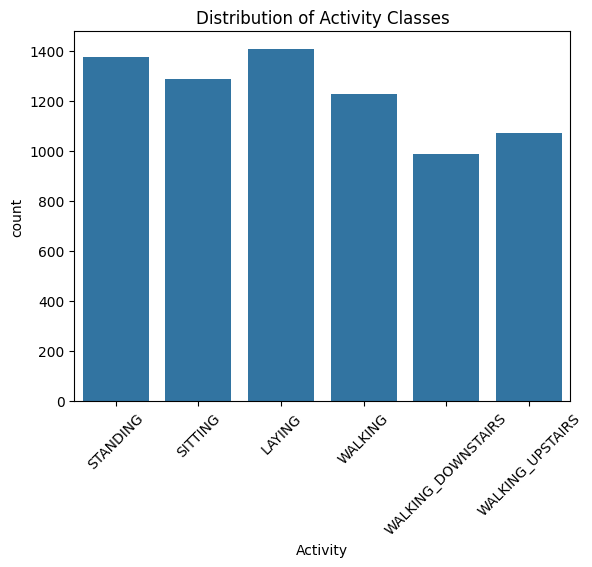

In [ ]:
sns.countplot(x='Activity', data=train_df)
plt.title('Distribution of Activity Classes')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from scipy.stats import f_oneway

anova_results = {col: f_oneway(*[group[col].values for name, group in train_df.groupby("Activity")]) for col in features.columns}



Random Forest Accuracy: 0.9267

Random Forest Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.92      0.89      0.90       491
          STANDING       0.90      0.93      0.91       532
           WALKING       0.90      0.97      0.93       496
WALKING_DOWNSTAIRS       0.96      0.84      0.90       420
  WALKING_UPSTAIRS       0.89      0.91      0.90       471

          accuracy                           0.93      2947
         macro avg       0.93      0.92      0.92      2947
      weighted avg       0.93      0.93      0.93      2947



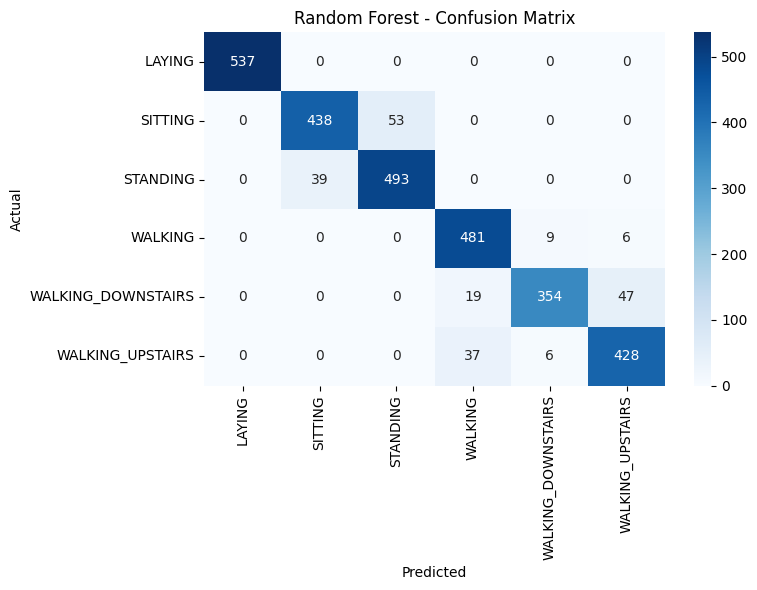


SVM Accuracy: 0.9525

SVM Classification Report:
                     precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       537
           SITTING       0.94      0.89      0.92       491
          STANDING       0.91      0.95      0.93       532
           WALKING       0.96      0.97      0.97       496
WALKING_DOWNSTAIRS       0.98      0.92      0.95       420
  WALKING_UPSTAIRS       0.93      0.97      0.95       471

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



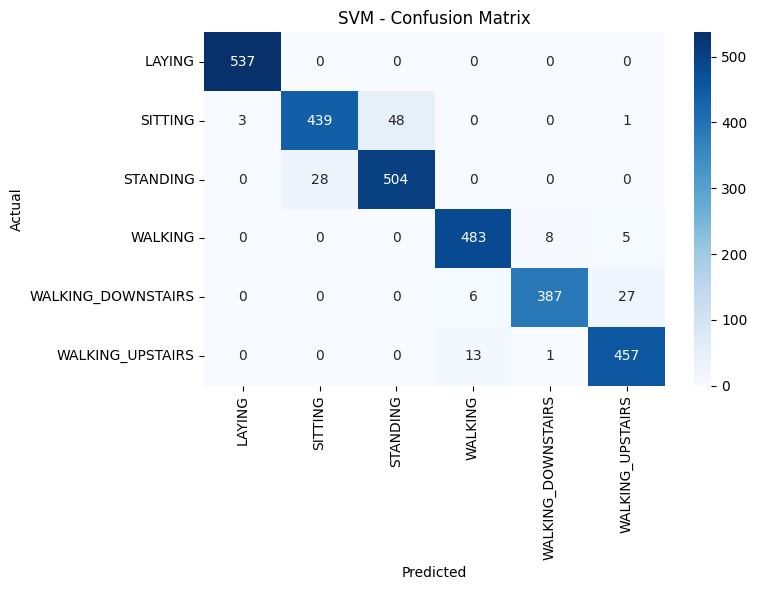

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------- Random Forest ----------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
rf_preds = rf.predict(X_test_scaled)

# ---------------------- Support Vector Machine ----------------------
svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train_scaled, y_train)
svm_preds = svm.predict(X_test_scaled)

# ---------------------- Evaluation ----------------------
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"\n{name} Classification Report:\n", classification_report(y_true, y_pred, target_names=le.classes_))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Evaluate both models
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("SVM", y_test, svm_preds)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Train & evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred))



Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.91      0.90      0.90       491
           2       0.91      0.92      0.91       532
           3       0.89      0.97      0.93       496
           4       0.96      0.85      0.90       420
           5       0.89      0.90      0.90       471

    accuracy                           0.93      2947
   macro avg       0.93      0.92      0.92      2947
weighted avg       0.93      0.93      0.93      2947


Model: SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.90      0.86      0.88       491
           2       0.88      0.92      0.90       532
           3       0.90      1.00      0.94       496
           4       0.99      0.85      0.92       420
           5       0.94      0.95      0.94       471

    accuracy                           0.93

In [ ]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Load the train data again
train_df = pd.read_csv(train_path)

# Exclude the target column
features = train_df.drop("Activity", axis=1)

# Compute summary statistics
summary_df = pd.DataFrame()
summary_df["Mean"] = features.mean()
summary_df["Median"] = features.median()
summary_df["Standard Deviation"] = features.std()
summary_df["Variance"] = features.var()
summary_df["Skewness"] = features.skew()
summary_df["Kurtosis"] = features.kurtosis()
summary_df["Min"] = features.min()
summary_df["Max"] = features.max()
summary_df["25% Quantile"] = features.quantile(0.25)
summary_df["50% Quantile"] = features.quantile(0.5)
summary_df["75% Quantile"] = features.quantile(0.75)

# Display the first few rows of the summary
print(summary_df.round(4).head())


                     Mean  Median  Standard Deviation  Variance  Skewness  \
tBodyAcc-mean()-X  0.2745  0.2772              0.0703    0.0049   -3.4483   
tBodyAcc-mean()-Y -0.0177 -0.0172              0.0408    0.0017   -0.4030   
tBodyAcc-mean()-Z -0.1091 -0.1087              0.0566    0.0032    1.7845   
tBodyAcc-std()-X  -0.6054 -0.9462              0.4487    0.2014    0.6774   
tBodyAcc-std()-Y  -0.5109 -0.8519              0.5026    0.2527    0.4059   

                   Kurtosis     Min     Max  25% Quantile  50% Quantile  \
tBodyAcc-mean()-X   50.9114 -1.0000  1.0000        0.2630        0.2772   
tBodyAcc-mean()-Y  172.4857 -1.0000  1.0000       -0.0249       -0.0172   
tBodyAcc-mean()-Z   85.9750 -1.0000  1.0000       -0.1210       -0.1087   
tBodyAcc-std()-X    -0.8656 -1.0000  1.0000       -0.9928       -0.9462   
tBodyAcc-std()-Y    -1.4527 -0.9999  0.9162       -0.9781       -0.8519   

                   75% Quantile  
tBodyAcc-mean()-X        0.2885  
tBodyAcc-mean()-Y 